# Import Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Load Dataset

In [2]:
df=pd.read_csv('home_price.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Column name

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Drop unnecessary columns

In [5]:
df.drop(['Address','Date','Postcode','Longtitude','Lattitude','YearBuilt'],axis=1,inplace=True)

In [6]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


# Check datatypes of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Bedroom2       26640 non-null  float64
 8   Bathroom       26631 non-null  float64
 9   Car            26129 non-null  float64
 10  Landsize       23047 non-null  float64
 11  BuildingArea   13742 non-null  float64
 12  CouncilArea    34854 non-null  object 
 13  Regionname     34854 non-null  object 
 14  Propertycount  34854 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


# Fill the null values by 0 and mean as required

In [8]:
df[['BuildingArea','Landsize']]=df[['BuildingArea','Landsize']].fillna(df[['BuildingArea','Landsize']].mean())
df[['Bedroom2','Bathroom','Car']]=df[['Bedroom2','Bathroom','Car']].fillna(0)

# Drop null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(27244, 15)

# check correlation

In [11]:
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
Rooms,1.000000,0.465231,0.284260,0.558408,0.448790,0.342667,0.027477,0.086560,-0.079572
Price,0.465231,1.000000,-0.211415,0.301524,0.339020,0.201809,0.027099,0.066240,-0.059017
Distance,0.284260,-0.211415,1.000000,0.157659,0.103052,0.189324,0.044124,0.050289,-0.021705
Bedroom2,0.558408,0.301524,0.157659,1.000000,0.842662,0.692635,0.017225,0.051179,-0.049639
Bathroom,0.448790,0.339020,0.103052,0.842662,1.000000,0.627156,0.023527,0.061372,-0.042507
Car,0.342667,0.201809,0.189324,0.692635,0.627156,1.000000,0.022484,0.049306,-0.024135
Landsize,0.027477,0.027099,0.044124,0.017225,0.023527,0.022484,1.000000,0.087274,-0.013485
BuildingArea,0.086560,0.066240,0.050289,0.051179,0.061372,0.049306,0.087274,1.000000,-0.016039
Propertycount,-0.079572,-0.059017,-0.021705,-0.049639,-0.042507,-0.024135,-0.013485,-0.016039,1.000000


<AxesSubplot:>

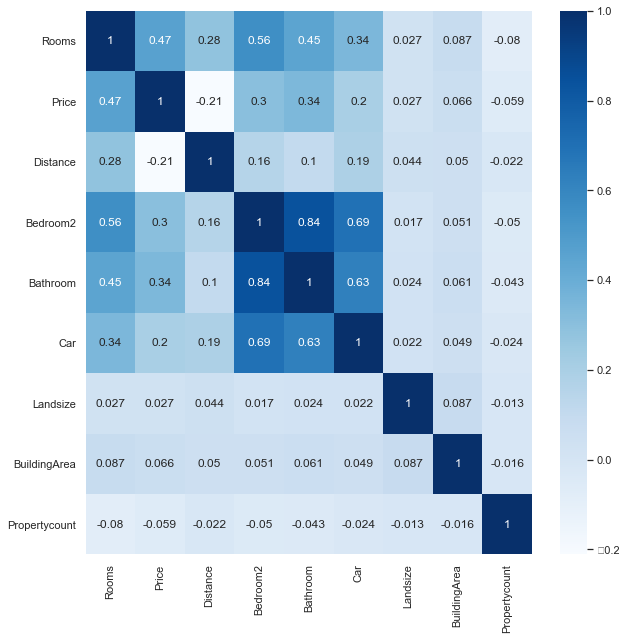

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# Data Analysis

<AxesSubplot:xlabel='Rooms'>

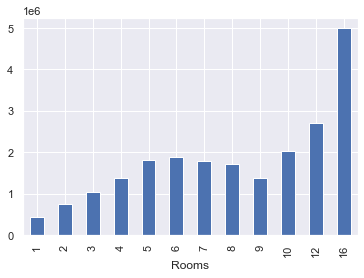

In [13]:
df.groupby('Rooms')['Price'].mean().plot(kind='bar')

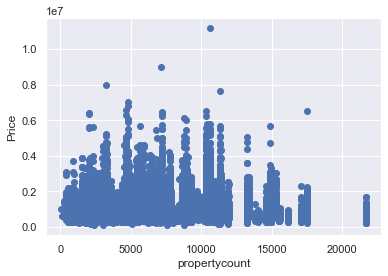

In [14]:
plt.scatter(df['Propertycount'],df['Price'])
plt.xlabel('propertycount')
plt.ylabel('Price')
plt.show()

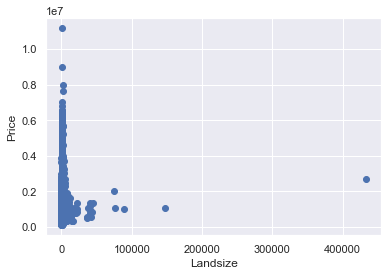

In [15]:
plt.scatter(df['Landsize'],df['Price'])
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

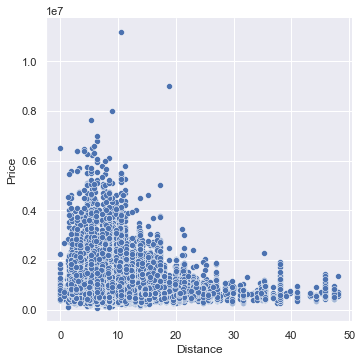

In [16]:
sns.relplot(x=df['Distance'],y=df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

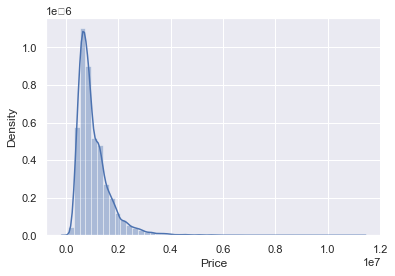

In [17]:
sns.distplot(df['Price'])

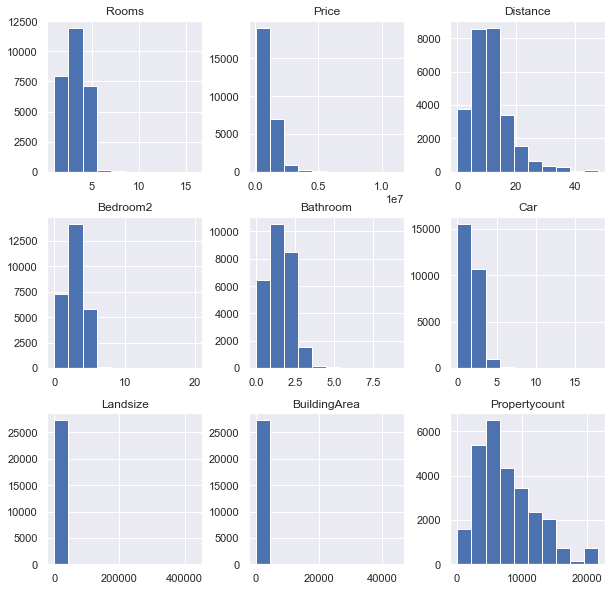

In [18]:
df.hist(figsize=(10,10))
plt.show()

# Create features and target variables

In [19]:
x=df.drop(['Price'],axis=1)
y=df['Price']

# One hot encoding for features

In [20]:
x=pd.get_dummies(x)

In [21]:
#from sklearn.preprocessing import StandardScaler

In [22]:
#x1=StandardScaler().fit_transform(x)

# Split data into train and test

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

# Apply LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(50)
lr.fit(x_train,y_train)

LinearRegression(fit_intercept=50)

In [25]:
lr.score(x_test,y_test)

0.13871990247664168

In [26]:
y_pred=lr.predict(x_test)

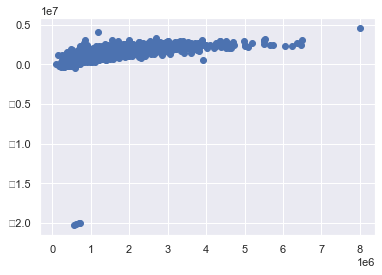

In [27]:
plt.scatter(y_test,y_pred)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [29]:
print("r2_score: ",r2_score(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score:  0.13871990247664168
MSE :  342202734617.78015
MAE :  246835.40944605955
RMSE :  584980.9694492464


# Model Regularization

# Ridge

In [30]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [31]:
y_predict=ridge.predict(x_test)

In [32]:
ridge.score(x_test,y_test)

0.6701872555358923

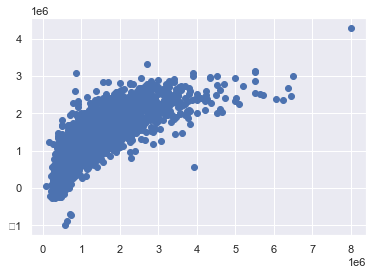

In [33]:
plt.scatter(y_test,y_predict)

In [34]:
print("r2_score: ",r2_score(y_test,y_predict))
print("MSE : ",mean_squared_error(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_predict)))

r2_score:  0.6701872555358923
MSE :  131040788463.53682
MAE :  237615.33750160452
RMSE :  361995.564148978


# Lasso

In [35]:
from sklearn.linear_model import Lasso
lasso=Lasso(50)
lasso.fit(x_train,y_train)

Lasso(alpha=50)

In [36]:
y_p=lasso.predict(x_test)

In [37]:
lasso.score(x_test,y_test)

0.6636158590877179

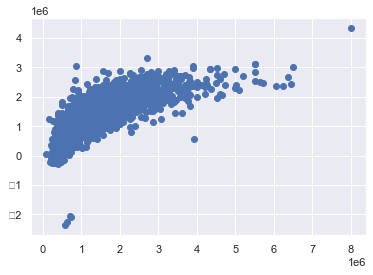

In [38]:
plt.scatter(y_test,y_p)

In [39]:
print("r2_score: ",r2_score(y_test,y_p))
print("MSE : ",mean_squared_error(y_test,y_p))
print("MAE : ",mean_absolute_error(y_test,y_p))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_p)))

r2_score:  0.6636158590877179
MSE :  133651727507.97688
MAE :  236945.75820874044
RMSE :  365584.09088467853


# RandomForest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(250).fit(x_train,y_train)

In [41]:
rf.score(x_test,y_test)

0.7765667404525041

In [42]:
yy_p=rf.predict(x_test)

In [43]:
print("r2_score: ",r2_score(y_test,yy_p))
print("MSE : ",mean_squared_error(y_test,yy_p))
print("MAE : ",mean_absolute_error(y_test,yy_p))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,yy_p)))

r2_score:  0.7765667404525041
MSE :  88774224136.35156
MAE :  172309.67490589866
RMSE :  297950.0363086931


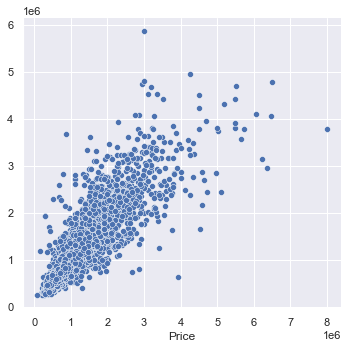

In [44]:
sns.relplot(y_test,yy_p)
